In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Questão 11

### Qual a probabilidade de um aluno matriculado em curso da área de computação ter algum tipo de deficiência e desistir do curso? Compare com a probabilidade disso ocorrer no geral.

### Aqui, usaremos novamente a fórmula para o cálculo da Taxa de Desistência Anual definida na questão 5.

In [14]:
alumn_column = ["TP_SITUACAO", "IN_INGRESSO_TOTAL", "CO_CINE_ROTULO", "IN_DEFICIENCIA"]
alunos = pd.read_csv(r"C:\Users\gmora\OneDrive\Área de Trabalho\Faculdade\CDD\TP\TreatedDfs\Curated\Aluno.csv", index_col=False, header=0, usecols=alumn_column, dtype={"CO_CINE_ROTULO": str} )

In [15]:
alunos_deficientes = alunos[alunos.IN_DEFICIENCIA == 1]

In [16]:
cine_columns = ["CO_CINE_ROTULO", "NO_CINE_AREA_GERAL", "CO_CINE_AREA_GERAL"]
cine = pd.read_csv(r"C:\Users\gmora\OneDrive\Área de Trabalho\Faculdade\CDD\TP\TreatedDfs\Curated\CINE.CSV", index_col=False, header=0, usecols=cine_columns)

In [17]:
alunos_deficientes = alunos_deficientes.merge(cine, on="CO_CINE_ROTULO", how='left') 

In [18]:
alunos_def_cdc = alunos_deficientes[alunos_deficientes.CO_CINE_AREA_GERAL == 6]

In [19]:
"""
Aqui é calculado a TADA para os alunos deficientes da área da computação
"""
tada_df_cdc_df = pd.DataFrame(columns=["CO_CINE_AREA_GERAL", "Tada"])


alunos_desistentes = alunos_def_cdc[alunos_def_cdc.TP_SITUACAO.isin([4,5])]
alunos_ingressos = alunos_def_cdc[alunos_def_cdc.IN_INGRESSO_TOTAL == 1]
alunos_rip = alunos_def_cdc[alunos_def_cdc.TP_SITUACAO == 7]
fator = np.size(alunos_desistentes)
quociente = np.size(alunos_ingressos)-np.size(alunos_rip)
if quociente == 0:
    salva_ai = {'CO_CINE_AREA_GERAL': 6, 'Tada': fator}
    #print(salva_ai)
    tada_df_cdc_df = tada_df_cdc_df.append(salva_ai, ignore_index=True)
else:
    #print(salva_ai)
    salva_ai = {'CO_CINE_AREA_GERAL': 6, 'Tada': (fator/quociente*100)}
    tada_df_cdc_df = tada_df_cdc_df.append(salva_ai, ignore_index=True)

In [20]:
alunos_def_outros = alunos_deficientes[alunos_deficientes.CO_CINE_AREA_GERAL != 6]

In [21]:
"""
Aqui é calculado a TADA para os alunos deficientes de todas as áreas diferentes de computação 
"""

tada_df_outros_df = pd.DataFrame(columns=["CO_CINE_AREA_GERAL", "Tada"])
for i in alunos_def_outros.CO_CINE_AREA_GERAL.unique():
    alunos_curso = alunos_def_outros[alunos_def_outros.CO_CINE_AREA_GERAL == i]
    alunos_desistentes = alunos_curso[alunos_curso.TP_SITUACAO.isin([4,5])]
    alunos_ingressos = alunos_curso[alunos_curso.IN_INGRESSO_TOTAL == 1]
    alunos_rip = alunos_curso[alunos_curso.TP_SITUACAO == 7]
    fator = np.size(alunos_desistentes)
    quociente = np.size(alunos_ingressos)-np.size(alunos_rip)
    if quociente == 0:
        salva_ai = {'CO_CINE_AREA_GERAL': i, 'Tada': fator}
        #print(salva_ai)
        tada_df_outros_df = tada_df_outros_df.append(salva_ai, ignore_index=True)
    else:
        #print(salva_ai)
        salva_ai = {'CO_CINE_AREA_GERAL': i, 'Tada': (fator/quociente*100)}
        tada_df_outros_df = tada_df_outros_df.append(salva_ai, ignore_index=True)

In [22]:
print("Probabilidade média dos alunos deficientes desistirem dos cursos:", tada_df_outros_df.Tada.mean())
print("Probabilidade de alunos deficientes da computação desistirem do curso:", tada_df_cdc_df.Tada.iloc[0])

Probabilidade média dos alunos deficientes desistirem dos cursos: 61.47988312393664
Probabilidade de alunos deficientes da computação desistirem do curso: 64.49086161879896


# Pergunta 12

## Essa pergunta será aborada na próxima parte do trabalho, pois iremos aplicar métodos de machine learning

# **Pergunta 13**

**Para responder essa pergunta, mostramos qual o curso com maior valor de alunos que participam de projetos de extensão, e também o valorproporcional a quantidade de alunos por curso.**

In [23]:
cine_column = ["CO_CINE_ROTULO", "NO_CINE_ROTULO"]
cine = pd.read_csv(r"C:\Users\gmora\OneDrive\Área de Trabalho\Faculdade\CDD\TP\TreatedDfs\Curated\CINE.CSV", index_col=False, header=0, usecols=cine_column)

In [24]:
alumn_column = ["ID_ALUNO", "IN_COMPLEMENTAR_EXTENSAO", "CO_CINE_ROTULO"]
Talunos = pd.read_csv(r"C:\Users\gmora\OneDrive\Área de Trabalho\Faculdade\CDD\TP\TreatedDfs\Curated\Aluno.csv", index_col=False, header=0, usecols=alumn_column)

c:\Users\gmora\OneDrive\Área de Trabalho\Faculdade\CDD\AmbienteCDD\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [25]:
cine["CO_CINE_ROTULO"] = cine.CO_CINE_ROTULO.astype(str)
Talunos["CO_CINE_ROTULO"] = Talunos.CO_CINE_ROTULO.astype(str)

alunos = Talunos.merge(cine, on="CO_CINE_ROTULO", how='left')
# O merge é feito para adicionar a coluna NO_CINE_ROTULO, que contém o nome dos cursos correspondentes aos seus códigos.
totalAlunos = alunos['NO_CINE_ROTULO'].value_counts()
totalAlunos
# Variável utilizada para organização do código, e que possui as informações de quantos alunos cada curso possui.

Direito                                 890237
Pedagogia                               865255
Administraτπo                           772022
Contabilidade                           424259
Enfermagem                              325242
                                         ...  
Produτπo pesqueira                           9
Engenharia bioenergΘtica                     8
Comunicaτπo assistiva                        3
AssistΩncia a idosos e a deficientes         1
Rochas ornamentais                           1
Name: NO_CINE_ROTULO, Length: 343, dtype: int64

In [26]:
valid_situation = [1]
result = alunos[alunos['IN_COMPLEMENTAR_EXTENSAO'].isin(valid_situation)]
# Realiza uma seleção que nos retorna quais alunos estão participando de projetos de extensão.

**Aqui é mostrado que 105452 alunos de direito participam de projetos de extensão, e também há um gráfico com os 19 outros cursos com maior número de alunos participando de projetos de extensão.**

In [27]:
primeirosCursos = result['NO_CINE_ROTULO'].value_counts().iloc[:20]
result['NO_CINE_ROTULO'].value_counts()
# Mostra quantos alunos estão participando de projetos de extensão por curso.

Direito                                         120957
Pedagogia                                        83781
Administraτπo                                    82221
Enfermagem                                       48747
Contabilidade                                    48170
                                                 ...  
Letras portuguΩs lφngua brasileira de sinais         1
Energias renovßveis                                  1
Manutenτπo de aeronaves                              1
Gestπo de serviτos                                   1
Engenharia bioenergΘtica                             1
Name: NO_CINE_ROTULO, Length: 300, dtype: int64

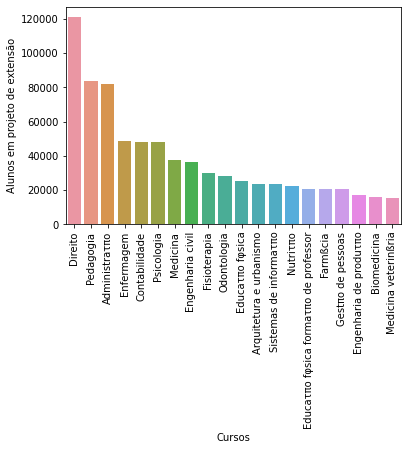

In [28]:
sns.barplot(x=list(primeirosCursos.keys()), y=list(dict(primeirosCursos).values()))
plt.xticks(rotation=90)
plt.ylabel("Alunos em projeto de extensão")
plt.xlabel("Cursos")
plt.show()
# Gráfico de barras para mostrar os 20 cursos com mais alunos participando de projetos de extensão.

**Já aqui, podemos ver que 100% dos alunos do curso de produção de cerveja participam de projetos de extensão.**

In [29]:
extensao = result['NO_CINE_ROTULO'].value_counts()
relacao = extensao/totalAlunos  #Foi verificado que esta divisão nos retorna o resultado esperado.
relacao.sort_values(ascending=(False)) * 100

Produτπo de cerveja                 100.000000
Podologia                            70.394737
Psicopedagogia                       47.455534
Enfermagem formaτπo de professor     43.317073
Defesa cibernΘtica                   42.473746
                                       ...    
Sistemas embarcados                        NaN
Soldagem                                   NaN
Telemßtica                                 NaN
Transporte aΘreo                           NaN
Transporte terrestre                       NaN
Name: NO_CINE_ROTULO, Length: 343, dtype: float64

# Pergunta 14

### Qual a distribuição das cores dos candidatos por meio de ingresso na instituição?

In [30]:
alumn_column = ["TP_COR_RACA", "IN_INGRESSO_VESTIBULAR",
"IN_INGRESSO_ENEM",
"IN_INGRESSO_AVALIACAO_SERIADA",
"IN_INGRESSO_SELECAO_SIMPLIFICA",
"IN_INGRESSO_VAGA_REMANESC",
"IN_INGRESSO_VAGA_PROG_ESPECIAL",
"IN_INGRESSO_TRANSF_EXOFFICIO",
"IN_INGRESSO_DECISAO_JUDICIAL",
"IN_INGRESSO_CONVENIO_PECG",
"IN_INGRESSO_EGRESSO"]

alunos = pd.read_csv(r"C:\Users\gmora\OneDrive\Área de Trabalho\Faculdade\CDD\TP\TreatedDfs\Curated\Aluno.csv", index_col=False, header=0, usecols=alumn_column )
alunos["TP_COR_RACA"] = alunos.TP_COR_RACA.replace([1,2,3,4,5], ["Branca", "Preta", "Parda", "Amarela", "Indígena"]) # Lógica para substituir os códigos das 
                                                                                                                     # raças pelos seus respectivos nomes

Tipo de ingressão: IN_INGRESSO_VESTIBULAR              {'Branca': 3191656, 'Parda': 2243037, 'Preta': 490583, 'Amarela': 132713, 'Indígena': 43622}


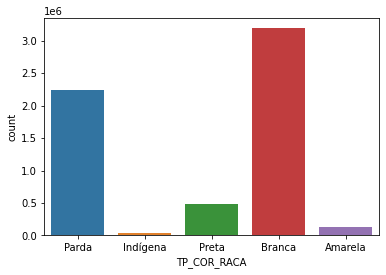

Tipo de ingressão: IN_INGRESSO_ENEM              {'Branca': 986149, 'Parda': 883413, 'Preta': 222522, 'Amarela': 37265, 'Indígena': 17194}


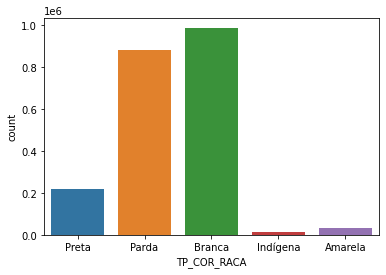

Tipo de ingressão: IN_INGRESSO_AVALIACAO_SERIADA              {'Parda': 22617, 'Branca': 21073, 'Preta': 3697, 'Amarela': 740, 'Indígena': 220}


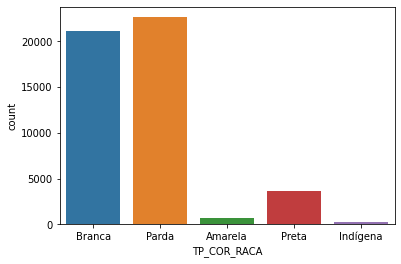

Tipo de ingressão: IN_INGRESSO_SELECAO_SIMPLIFICA              {'Branca': 362545, 'Parda': 206428, 'Preta': 51901, 'Amarela': 10018, 'Indígena': 8138}


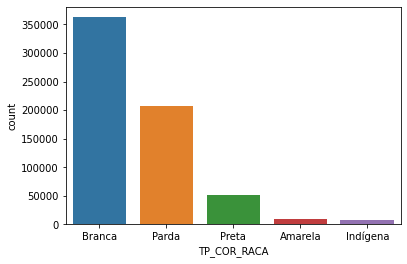

Tipo de ingressão: IN_INGRESSO_VAGA_REMANESC              {'Branca': 672843, 'Parda': 371637, 'Preta': 95993, 'Amarela': 25809, 'Indígena': 6039}


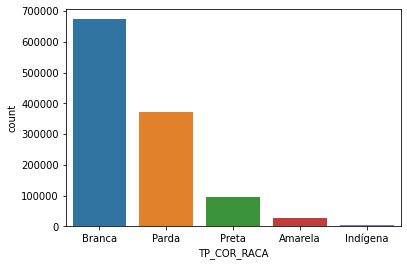

Tipo de ingressão: IN_INGRESSO_VAGA_PROG_ESPECIAL              {'Parda': 14606, 'Branca': 10852, 'Preta': 2668, 'Indígena': 1799, 'Amarela': 430}


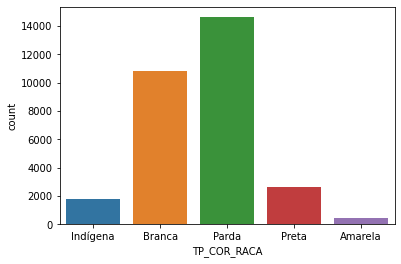

Tipo de ingressão: IN_INGRESSO_TRANSF_EXOFFICIO              {'Branca': 6469, 'Parda': 5270, 'Preta': 1037, 'Amarela': 194, 'Indígena': 79}


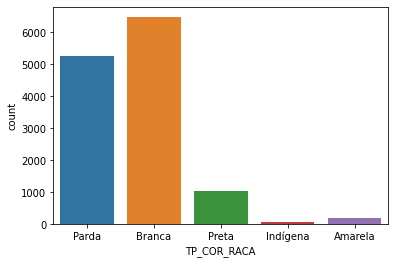

Tipo de ingressão: IN_INGRESSO_DECISAO_JUDICIAL              {'Branca': 1822, 'Parda': 1777, 'Preta': 394, 'Amarela': 75, 'Indígena': 50}


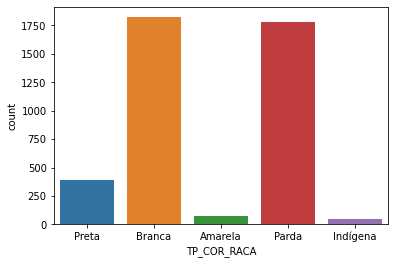

Tipo de ingressão: IN_INGRESSO_CONVENIO_PECG              {'Preta': 932, 'Branca': 344, 'Parda': 138, 'Amarela': 30, 'Indígena': 15}


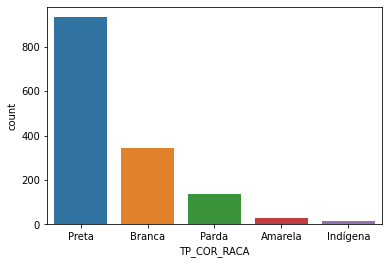

Tipo de ingressão: IN_INGRESSO_EGRESSO              {'Branca': 2829, 'Parda': 2180, 'Preta': 873, 'Amarela': 229, 'Indígena': 33}


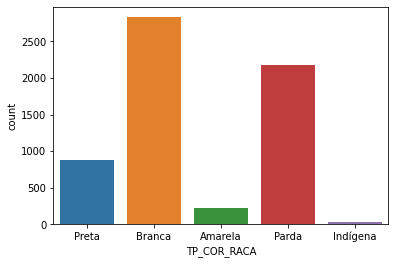

In [31]:
tipos_ingresso = ["IN_INGRESSO_VESTIBULAR",
"IN_INGRESSO_ENEM",
"IN_INGRESSO_AVALIACAO_SERIADA",
"IN_INGRESSO_SELECAO_SIMPLIFICA",
"IN_INGRESSO_VAGA_REMANESC",
"IN_INGRESSO_VAGA_PROG_ESPECIAL",
"IN_INGRESSO_TRANSF_EXOFFICIO",
"IN_INGRESSO_DECISAO_JUDICIAL",
"IN_INGRESSO_CONVENIO_PECG",
"IN_INGRESSO_EGRESSO"] # Lista com todos as colunas de ingrassão para utilizar no for

# For para exibir os dados da distruibuição das raças para cada tipo de ingressão na IES
for tipo in tipos_ingresso:
    ing = alunos[alunos[tipo] == 1]

    # Exibe a quantidade de alunos separados pelas raças que ingressaram com tal tipo de ingressão
    print("Tipo de ingressão: " + tipo + "             " , ing["TP_COR_RACA"].value_counts().to_dict())

    sns.countplot(x='TP_COR_RACA', data=ing)
    plt.show()
    
    

# Pergunta 15

### Comparação da relação entre as cores dos estudantes nas instituições públicas e privadas

In [32]:
alumn_column = ["TP_COR_RACA", "TP_CATEGORIA_ADMINISTRATIVA"]
alunos = pd.read_csv(r"C:\Users\gmora\OneDrive\Área de Trabalho\Faculdade\CDD\TP\TreatedDfs\Curated\Aluno.csv", index_col=False, header=0, usecols=alumn_column )

In [33]:
alunos["TP_COR_RACA"] = alunos.TP_COR_RACA.replace([1,2,3,4,5], ["Branca", "Preta", "Parda", "Amarela", "Indígena"]) # Lógica para substituir os códigos das raças
                                                                                                                    # pelo seus respectivos nomes

In [34]:
alunosParticular = alunos[(alunos.TP_CATEGORIA_ADMINISTRATIVA == 4) | (alunos.TP_CATEGORIA_ADMINISTRATIVA == 5)
                             | (alunos.TP_CATEGORIA_ADMINISTRATIVA == 6)  | (alunos.TP_CATEGORIA_ADMINISTRATIVA == 8)
                              | (alunos.TP_CATEGORIA_ADMINISTRATIVA == 9)] # TP_CATEGORIA_ADMINISTRATIVA 4, 5, 6, 8 e 9 são de IES particulares

{'Branca': 4007950, 'Parda': 2785081, 'Preta': 606953, 'Amarela': 154123, 'Indígena': 58123}


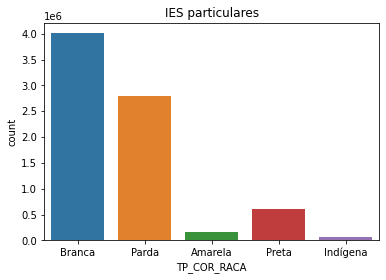

In [35]:
print(alunosParticular['TP_COR_RACA'].value_counts().to_dict()) # printa a quantidade de alunos de IES particulares separado pela raça

sns.countplot(x='TP_COR_RACA', data=alunosParticular)
plt.title("IES particulares")
plt.show()

In [36]:
alunosPublico = alunos[(alunos.TP_CATEGORIA_ADMINISTRATIVA == 1) | (alunos.TP_CATEGORIA_ADMINISTRATIVA == 2)
                            | (alunos.TP_CATEGORIA_ADMINISTRATIVA == 3)] # TP_CATEGORIA_ADMINISTRATIVA 1, 2 e 3 são de IES públicas

{'Branca': 983085, 'Parda': 779512, 'Preta': 218229, 'Amarela': 44970, 'Indígena': 16570}


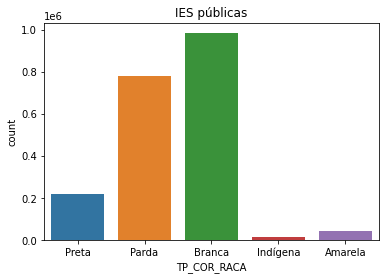

In [37]:
print(alunosPublico['TP_COR_RACA'].value_counts().to_dict()) # printa a quantidade de alunos de IES públicas separado pela raça

sns.countplot(x='TP_COR_RACA', data=alunosPublico)
plt.title("IES públicas")
plt.show()